# ATTEMPT AT VALIDATION WITH SCRAPED MP OPINIONS

## TV2 candidate test

In [1]:
import requests
import time
from tqdm.notebook import tqdm
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import json
from bs4 import BeautifulSoup


In [ ]:
constituencies = {
    '9000100': 'København',
    '9000200': 'Københavns Omegn',
    '9000300': 'Nordsjælland',
    '9000400': 'Bornholm',
    '9000500': 'Sjælland',
    '9000600': 'Fyn',
    '9000700': 'Sydjylland',
    '9000800': 'Østjylland',
    '9000900': 'Vestjylland',
    '9001000': 'Nordjylland'
}

# for const in tqdm(constituencies.keys()):
#     url = 'https://election-api.services.tv2.dk/fv/fv22/candidatetest/answers/' + const
#     r = requests.get(url)
#     data = r.json()
#     with open('validation/tv2/candidates_' + const + '.json', 'w') as f:
#         json.dump(data, f)
    
#     time.sleep(20)

In [2]:
# load and merge all the json files
import pandas as pd

path = r'validation/tv2' # use your path
all_files = glob.glob(path + "/*.json")

li = []

for filename in all_files:
    with open(filename) as f:
        data = json.load(f)
    li.append(pd.DataFrame(data))

can = pd.concat(li, axis=0, ignore_index=True)

In [3]:
# unpack answers column
can = can.join(pd.json_normalize(can['answers']))

In [4]:
for i, key in enumerate(list(can.answers[0].keys())[1:25]):
    can[key] = can['answers'].apply(lambda x: x[key]['answer'])

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [9]:
# drop unnecessary columns
can = can[[
    'name',
    'partyLetter',
    '1a',
    '1b',
    '2a',
    '2b',
    '3a',
    '3b',
    '4a',
    '4b',
    '5a',
    '5b',
    '6a',
    '6b',
    '7a',
    '7b',
    '8a',
    '8b',
    '9a',
    '9b',
    '10a',
    '10b',
    '11a',
    '11b',
    '12a',
    '12b'
    ]]

In [10]:
varmap = {
    '1a': 'okse_afgift',
    '1b': 'co2_afgift',
    '2a': 'lon_sundhed',
    '2b': 'cig_afgift',
    '3a': '2pct_bnp',
    '3b': 'ulbist_op',
    '4a': 'ulig_mindsk',
    '4b': 'inflat_komp',
    '5a': 'brugerbet_aeldre',
    '5b': 'ress_aeldre',
    '6a': 'udl_for_stram',
    '6b': 'asyl_rwanda',
    '7a': 'atomkraft_ja',
    '7b': 'uaf_rus_en',
    '8a': 'ress_pysk_ung',
    '8b': 'ress_pas_boern',
    '9a': 'su_laan',
    '9b': 'skol_inklus',
    '10a': 'for_hoej_overf',
    '10b': 'behold_arne',
    '11a': 'mette_rigtig',
    '11b': 'mette_rigsret',
    '12a': 'corona_aaben',
    '12b': 'krav_test_uvac'
}

In [11]:
# partymap
partymap = {
    'v': 'V',
    'o': 'DF',
    'b': 'RV',
    'ø': 'EL',
    'c': 'KF',
    'i': 'LA',
    'd': 'NB',
    'f': 'SF',
    'å': 'ALT',
    'm': 'M',
    'æ': 'DD',
    'k': 'KD',
    'a': 'S',
    'q': 'FG',
    '': np.nan
    }

In [12]:
colormap = {
    'S': '#C8042C',
    'V': '#1A4289',
    'DF': '#265BA4',
    'EL': '#BF2850',
    'SF': '#B42D27',
    'KF': '#24573E',
    'RV': '#D82E8A',
    'LA': '#E7B657',
    'ALT': '#75FB4C',
    'NB': '#1E4B57',
    'KD': '#566197',
    'FG': '#E4F04E',
    'DD': '#3470BC',
    'M': '#7A308B',
    'SIU': 'lightgrey',
    'UFG': 'lightgrey'
}

In [13]:
# map variable names
can = can.rename(columns=varmap)

# map party names
can['partyLetter'] = can['partyLetter'].map(partymap)

In [14]:
# apply rescale function to all numeric variables in can
def rescale(var):
    var = (var - var.min()) / (var.max() - var.min())
    var = 2 * var - 1
    return var

numeric = can.select_dtypes(include=['float64', 'int64']).columns

# rescale all numeric
for var in numeric:
    can[var] = rescale(can[var])


In [15]:
# map colors
can['color'] = can['partyLetter'].map(colormap)

In [16]:
can

,name,partyLetter,okse_afgift,co2_afgift,lon_sundhed,cig_afgift,2pct_bnp,ulbist_op,ulig_mindsk,inflat_komp,...,ress_pas_boern,su_laan,skol_inklus,for_hoej_overf,behold_arne,mette_rigtig,mette_rigsret,corona_aaben,krav_test_uvac,color
0,Anita Vivi Lilholt,V,-1.0,-0.5,0.0,0.0,0.0,-1.0,-0.5,0.5,...,0.0,0.5,0.0,0.5,0.0,-1.0,1.0,0.0,0.0,#1A4289
1,Anne Honoré Østergaard,V,-1.0,-0.5,0.5,1.0,0.5,-0.5,0.0,0.5,...,0.5,-0.5,0.0,0.5,0.0,-1.0,1.0,0.5,-0.5,#1A4289
2,Henrik Buchhave,V,-1.0,0.0,1.0,0.5,0.0,0.0,0.0,0.5,...,0.0,0.0,-1.0,1.0,1.0,-1.0,0.5,1.0,0.0,#1A4289
3,Maja Torp,V,-0.5,0.0,0.5,0.0,0.5,-0.5,0.0,0.0,...,0.5,0.0,-0.5,0.5,0.0,-0.5,0.5,0.5,0.5,#1A4289
4,Marie Bjerre,V,-0.5,0.0,0.5,0.5,1.0,-0.5,0.0,0.5,...,0.5,-0.5,0.0,0.5,0.0,-1.0,1.0,0.5,-1.0,#1A4289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,Kris Jensen Skriver,S,0.5,0.5,0.5,1.0,-0.5,0.0,0.5,0.5,...,-0.5,-0.5,-0.5,-0.5,1.0,0.5,-1.0,0.0,-0.5,#C8042C
958,Niels Ole Beck,S,-0.5,0.5,0.5,0.5,-0.5,0.0,0.5,0.0,...,0.0,-1.0,0.0,-0.5,1.0,1.0,-1.0,0.0,0.0,#C8042C
959,Theis Kylling Hommeltoft,S,1.0,-0.5,1.0,0.5,-0.5,-0.5,0.5,-0.5,...,0.5,-0.5,-0.5,-0.5,0.5,1.0,-1.0,0.5,1.0,#C8042C
960,Marianne Karlberg,FG,1.0,1.0,1.0,1.0,-0.5,1.0,1.0,-0.5,...,-1.0,-1.0,-1.0,-0.5,1.0,-1.0,1.0,0.0,1.0,#E4F04E


In [19]:
# Imports
from politician2vec import Politician2Vec
from politician2vec.utils import *
import pickle

# Specify path to preprocessed dataset
test_data_path = 'data/clean/preprocessed_docs_2015_low.p'
# We remove North-Atlantic politicians due to them skewing the corpus with very few, concentrated observations
parl_data = pd.read_pickle(test_data_path).query("party not in ['SIU', 'NQ', 'JF', 'SP']")
parl_data.shape
parl_data['party'].value_counts()
parl_data['party'].value_counts(dropna = False)
grouped_docs = parl_data.groupby(['full_name', 'party'])['doc'].apply('. '.join).reset_index()
docs = [doc for doc in grouped_docs.doc]
parties = np.array([party for party in grouped_docs.party])

In [20]:
# drop all obs from can if name not in grouped_docs['full_name']
can = can[can['name'].isin(grouped_docs['full_name'])]

In [21]:
# flip variables in can
flip_vars = [
    'brugerbet_aeldre',
    'for_hoej_overf',
    'su_laan',
    'asyl_rwanda',
    'atomkraft_ja',
    '2pct_bnp'
]

for var in flip_vars:
    can[var] = can[var] * -1

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [23]:
can[[
    'udl_for_stram',
    'asyl_rwanda',
    'co2_afgift',
    'okse_afgift',
    'atomkraft_ja',
    '2pct_bnp',
    #'corona_aaben',
    #'krav_test_uvac'
    ]].corr()


,udl_for_stram,asyl_rwanda,co2_afgift,okse_afgift,atomkraft_ja,2pct_bnp
udl_for_stram,1.000000,0.896354,0.668967,0.740590,0.480836,0.638085
asyl_rwanda,0.896354,1.000000,0.625249,0.644159,0.424687,0.581135
co2_afgift,0.668967,0.625249,1.000000,0.694336,0.569170,0.528517
okse_afgift,0.740590,0.644159,0.694336,1.000000,0.514277,0.526995
atomkraft_ja,0.480836,0.424687,0.569170,0.514277,1.000000,0.572374
2pct_bnp,0.638085,0.581135,0.528517,0.526995,0.572374,1.000000


In [33]:
can[[
    'ulig_mindsk',
    'inflat_komp',
    'for_hoej_overf',
    'ulbist_op',
    'lon_sundhed',
    'su_laan'
    ]].corr()

,ulig_mindsk,inflat_komp,for_hoej_overf,ulbist_op,lon_sundhed,su_laan
ulig_mindsk,1.000000,0.297089,0.708458,0.612186,0.479103,0.621389
inflat_komp,0.297089,1.000000,0.253559,0.109253,0.444201,0.268861
for_hoej_overf,0.708458,0.253559,1.000000,0.519231,0.454872,0.611590
ulbist_op,0.612186,0.109253,0.519231,1.000000,0.423934,0.749681
lon_sundhed,0.479103,0.444201,0.454872,0.423934,1.000000,0.524299
su_laan,0.621389,0.268861,0.611590,0.749681,0.524299,1.000000


In [59]:
# create scales:
can['distrib_scale'] = (
    can['ulig_mindsk']
    #+ can['inflat_komp']
    + can['for_hoej_overf']
    #+ can['ulbist_op']
    #+ can['lon_sundhed']
    + can['su_laan']
    ) / 3

can['value_scale'] = (
    can['udl_for_stram']
    + can['asyl_rwanda']
    + can['co2_afgift']
    #+ can['okse_afgift']
    #+ can['atomkraft_ja']
    #+ can['2pct_bnp']
    ) / 3

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


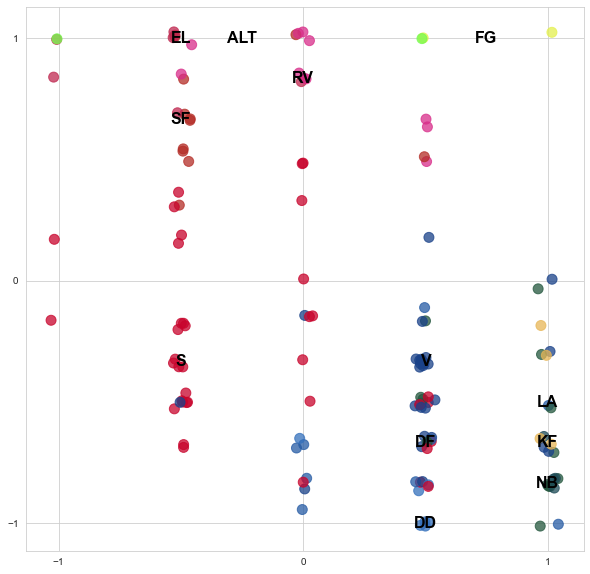

In [60]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return plt.scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, **kwargs)


# plot two variables against each other
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10, 10))

# jitter two variables against each other
jitter(-can['distrib_scale'], can['value_scale'], c=can['color'], s=100, alpha=0.75)

# add label at the median of each group
medians = can.groupby('partyLetter').median().reset_index()
for i, row in medians.iterrows():
    ax.text(-row['distrib_scale'], row['value_scale'], row['partyLetter'], horizontalalignment='center', verticalalignment='center', color='black', weight='bold', size=16)

ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])

plt.show()


In [61]:
can[['name', 'partyLetter', 'distrib_scale', 'value_scale']].to_pickle('validation/tv2/tv2_scales.p')

In [55]:
# load combined_hover and plot_data from validation folder
combined_hover = pd.read_csv('validation/combined_hover.csv')
xy = pd.read_csv('validation/plot_data.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'validation/combined_hover.csv'

In [49]:
# drop duplicates of full_name
combined_hover = combined_hover.drop_duplicates(subset='full_name', keep='last')

# filter combined_hover to only include politicians in can
combined_hover = combined_hover[combined_hover['full_name'].isin(can['name'])]

# filter xy to only include indeces in combined_hover
xy = xy[xy.index.isin(combined_hover.index)]

In [50]:
# add xy to combined_hover
combined_hover = pd.concat([combined_hover, xy], axis=1)

# join can and combined_hover
merged = can.merge(combined_hover, left_on='name', right_on='full_name')

In [51]:
merged.columns

Index(['name', 'partyLetter', 'okse_afgift', 'co2_afgift', 'lon_sundhed',
       'cig_afgift', '2pct_bnp', 'ulbist_op', 'ulig_mindsk', 'inflat_komp',
       'brugerbet_aeldre', 'ress_aeldre', 'udl_for_stram', 'asyl_rwanda',
       'atomkraft_ja', 'uaf_rus_en', 'ress_pysk_ung', 'ress_pas_boern',
       'su_laan', 'skol_inklus', 'for_hoej_overf', 'behold_arne',
       'mette_rigtig', 'mette_rigsret', 'corona_aaben', 'krav_test_uvac',
       'color_x', 'distrib_scale', 'value_scale', 'doc', 'party', 'snippet',
       'color_y', 'full_name', 'rank', 'x', 'y'],
      dtype='object')

In [412]:
# join parl_data['full_name'].value_counts() to merged
merged = merged.merge(parl_data['full_name'].value_counts().reset_index(), left_on='name', right_on='index').rename(columns={'full_name_y': 'doc_count'})

In [487]:
merged_slice = merged.loc[merged['doc_count']>950]

In [488]:
# pearson r between merged['y'], merged['value_scale']
from scipy.stats import pearsonr
print(pearsonr(-merged_slice['x'], merged_slice['distrib_scale']))
print(pearsonr(merged_slice['y'], merged_slice['value_scale']))

(0.5828404311601538, 0.008820255833639786)
(0.6461633409018881, 0.0027991327465275687)


In [489]:
merged_slice.shape

(19, 40)

In [447]:
merged_slice.shape

(34, 40)

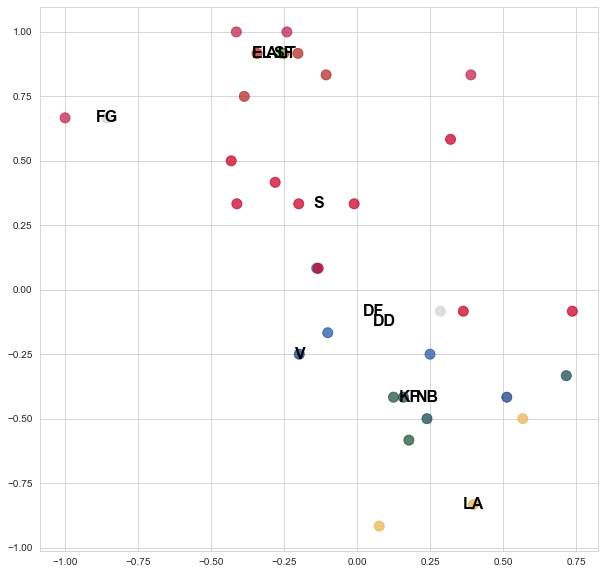

In [448]:
# plot two variables against each other in a scatterplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(merged_slice['x'], merged_slice['distrib_scale'], c=merged_slice['color_y'], s=100, alpha=0.75)

#add party label at median of each group
medians = merged_slice.groupby('partyLetter').median().reset_index()
for i, row in medians.iterrows():
    ax.text(row['x'], row['distrib_scale'], row['partyLetter'], horizontalalignment='center', verticalalignment='center', color='black', weight='bold', size=16)


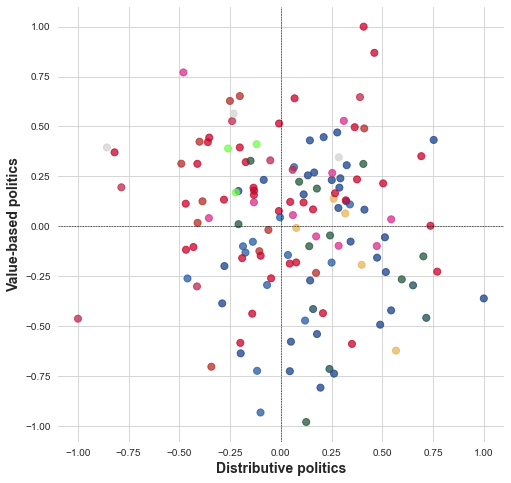

In [449]:
# Initialize the plot and set the axis labels
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111) #, projection='3d'
ax.set_xlabel('Distributive politics', size = 14, weight = 'bold')
ax.set_ylabel('Value-based politics', size = 14, weight = 'bold')
#ax.set_zlabel('Moralised politics')

xs=xy['x']
ys=xy['y']

ax.scatter(xs, ys, s=50, alpha=0.75, color=combined_hover['color'])

# add labels at median of each party
# for party in party_labels['party']:
#     party_emb = normalised_emb[combined_hover['party'] == party]
#     party_xs = party_emb[:,0]
#     party_ys = party_emb[:,1]
#     ax.text(np.median(party_xs), np.median(party_ys), party, size=12, color='black', weight = 'bold', path_effects=[pe.withStroke(linewidth=4, foreground='white')])


# add vline to plot
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
ax.axhline(y=-0, color='black', linestyle='--', linewidth=0.5)

for spine in ax.spines.values():
    spine.set_visible(False)

# Show the plot
plt.show()

## DR/Altinget candidate test

In [4]:
# Candidates are numbered from 1 - 1137
for i in tqdm(range(1,1137+1)):
    url = 'https://www.dr.dk/nyheder/politik/folketingsvalg/din-stemmeseddel/kandidater/' + str(i)
    r = requests.get(url)
    
    # parse page with BeautifulSoup
    soup = BeautifulSoup(r.text, 'html.parser')
    
    try: 
        # extract by script id "__NEXT_DATA__"
        data = json.loads(soup.find('script', id='__NEXT_DATA__').contents[0])

        with open('validation/dr/candidate_no_' + str(i) + '.json', 'w') as f:
            json.dump(data, f)
    
    except AttributeError:
        print('No data for candidate no. ' + str(i))

    # Wait a few secs for good measure
    time.sleep(2)

  0%|          | 0/1137 [00:00<?, ?it/s]

No data for candidate no. 2
No data for candidate no. 32
No data for candidate no. 41
No data for candidate no. 91
No data for candidate no. 153
No data for candidate no. 155
No data for candidate no. 156
No data for candidate no. 158
No data for candidate no. 167
No data for candidate no. 183
No data for candidate no. 195
No data for candidate no. 199
No data for candidate no. 229
No data for candidate no. 247
No data for candidate no. 251
No data for candidate no. 299
No data for candidate no. 318
No data for candidate no. 368
No data for candidate no. 372
No data for candidate no. 376
No data for candidate no. 377
No data for candidate no. 378
No data for candidate no. 384
No data for candidate no. 385
No data for candidate no. 388
No data for candidate no. 389
No data for candidate no. 390
No data for candidate no. 392
No data for candidate no. 394
No data for candidate no. 397
No data for candidate no. 398
No data for candidate no. 399
No data for candidate no. 401
No data for can

In [35]:
# open first candidate json and inspect questions
with open('validation/dr/candidate_no_1.json') as f:
    data = json.load(f)

data['props']['pageProps']['questions']

[{'ID': 530,
  'Title': 'KLIMA OG ENERGI',
  'Question': 'Danmark skal bruge flere penge på at styrke tog- og busdrift frem for at bygge nye motorveje',
  'Info': '',
  'ArgumentFor': 'Den kollektive trafik bør være billig og tilgængelig for så mange som muligt, desuden er biltrafik en af de helt store klimasyndere',
  'ArgumentAgainst': 'Det er dyrt for statskassen at opretholde driften af busser og tog. Et godt vejnet er vigtigt for erhvervslivet og skaber arbejdspladser',
  'WordMerger': 0,
  'ID_CandidateQuestionType': 1,
  'Rule': 'FT',
  'QuestionListData': None},
 {'ID': 531,
  'Title': 'ARBEJDSMARKED OG ØKONOMI',
  'Question': 'Der skal indføres en særlig skat på de allerhøjeste indkomster',
  'Info': '',
  'ArgumentFor': 'Historisk rammer kriser de fattigste hårdest. En såkaldt millionærskat vil mindske uligheden i samfundet og styrke sammenhængskraften. Den kan samtidig bidrage til statskassen i en tid, hvor velfærdsudgifterne er stigende',
  'ArgumentAgainst': 'Det danske sa

In [79]:
eu_qs = {
    534: 'dk_out_eu', #'På sigt skal Danmark meldes ud af EU'
    535: 'dk_up_def', #'Det er fornuftigt, at Danmark i de kommende år bruger markant flere penge på forsvaret'
    551: 'dk_de_border', #'Der skal være permanent grænsekontrol mellem Danmark og Tyskland'
    555: 'asyl_out_eu' #'Asylansøgere bør sendes til et land uden for EU - f.eks. Rwanda - mens deres ansøgning behandles'
}

# load and combine the json files into one dataframe
path = 'validation/dr/*.json'
files = glob.glob(path)

df = pd.DataFrame()

for file in tqdm(files):
    with open(file) as f:
        data = json.load(f)
    
    try:
        # get candidate data
        cand_data = data['props']['pageProps']['candidate']

        answers = pd.DataFrame(data['props']['pageProps']['candidateAnswers'])[['QuestionID', 'Answer']]
        
        for key, val in eu_qs.items():
            cand_data[val] = answers.loc[answers['QuestionID'] == key, 'Answer'].values[0]

        df = df.append(cand_data, ignore_index=True)
        
        
    except:
        print('Answers missing for', file)

  0%|          | 0/1015 [00:00<?, ?it/s]

Answers missing for validation/dr/candidate_no_21.json
Answers missing for validation/dr/candidate_no_1068.json
Answers missing for validation/dr/candidate_no_1087.json
Answers missing for validation/dr/candidate_no_1101.json
Answers missing for validation/dr/candidate_no_1117.json
Answers missing for validation/dr/candidate_no_1072.json
Answers missing for validation/dr/candidate_no_1137.json
Answers missing for validation/dr/candidate_no_1033.json
Answers missing for validation/dr/candidate_no_1064.json
Answers missing for validation/dr/candidate_no_518.json
Answers missing for validation/dr/candidate_no_1121.json
Answers missing for validation/dr/candidate_no_1048.json
Answers missing for validation/dr/candidate_no_935.json
Answers missing for validation/dr/candidate_no_889.json
Answers missing for validation/dr/candidate_no_923.json
Answers missing for validation/dr/candidate_no_562.json
Answers missing for validation/dr/candidate_no_1120.json
Answers missing for validation/dr/cand

In [86]:
df['LinedUpForParty']
df['LinedUpForParty']

0                      Liberal Alliance
1                     Socialdemokratiet
2           Det Konservative Folkeparti
3      Venstre, Danmarks Liberale Parti
4          Enhedslisten – De Rød-Grønne
                     ...               
902                    Radikale Venstre
903                   Socialdemokratiet
904                    Liberal Alliance
905                      Nye Borgerlige
906                         Moderaterne
Name: LinedUpForParty, Length: 907, dtype: object

In [87]:
#df.to_pickle('validation/dr/full_df.p')

In [2]:
df = pd.read_pickle('validation/dr/full_df.p')

In [3]:
selected_cols = [
    'Firstname',
    'LastName',
    'LinedUpForParty',
    'dk_out_eu',
    'dk_up_def',
    'dk_de_border',
    'asyl_out_eu'
]

df_subset = df[selected_cols]

In [4]:
df_subset['fullname'] = df_subset['Firstname'] + ' ' + df_subset['LastName']

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
# partymap
partymap = {
    'Det Konservative Folkeparti': 'KF',
    'Socialdemokratiet': 'S',
    'Venstre, Danmarks Liberale Parti': 'V',
    'Liberal Alliance': 'LA',
    'Enhedslisten – De Rød-Grønne': 'EL',
    'SF - Socialistisk Folkeparti': 'SF',
    'Alternativet': 'ALT',
    'Radikale Venstre': 'RV',
    'Nye Borgerlige': 'NB',
    'Dansk Folkeparti': 'DF',
    'Moderaterne': 'M',
    'Kristendemokraterne': 'KD',
    'Danmarksdemokraterne ‒ Inger Støjberg': 'DD',
    'Frie Grønne': 'FG',
    'Uden for partierne': np.nan
    }

In [6]:
df_subset['party'] = df_subset['LinedUpForParty'].map(partymap)

/Users/mathiasbruun/me/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_scales = df_subset[['fullname', 'party', 'dk_out_eu', 'dk_up_def', 'dk_de_border', 'asyl_out_eu']]
print(df_scales.shape)
df_scales.replace(0, np.nan)
df_scales = df_scales.loc[~df_scales.isin([0]).any(axis=1)]
print(df_scales.shape)

(904, 6)
(892, 6)


In [34]:
df_scales.to_pickle('validation/dr/df_scales.p')

In [13]:
df_scales.dk_out_eu.describe()

count    892.000000
mean       1.865471
std        1.386101
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: dk_out_eu, dtype: float64

In [14]:
# correlation matrix
corr = df_scales[['dk_out_eu', 'dk_up_def', 'dk_de_border', 'asyl_out_eu']].corr()
corr.style.background_gradient(cmap='coolwarm')

,dk_out_eu,dk_up_def,dk_de_border,asyl_out_eu
dk_out_eu,1.000000,-0.065465,0.526082,0.232733
dk_up_def,-0.065465,1.000000,0.414790,0.595264
dk_de_border,0.526082,0.414790,1.000000,0.669421
asyl_out_eu,0.232733,0.595264,0.669421,1.000000


In [18]:
df_scales['color'] = df_scales['party'].map(colormap)
df_scales['color'] = df_scales['color'].fillna('black')

In [30]:
df_scales['index'] = df_scales['dk_out_eu'] # (df_scales['dk_out_eu'] + df_scales['dk_de_border']) / 2

# rescale index to -1 to 1
df_scales['index'] = (df_scales['index'] - df_scales['index'].min()) / (df_scales['index'].max() - df_scales['index'].min())

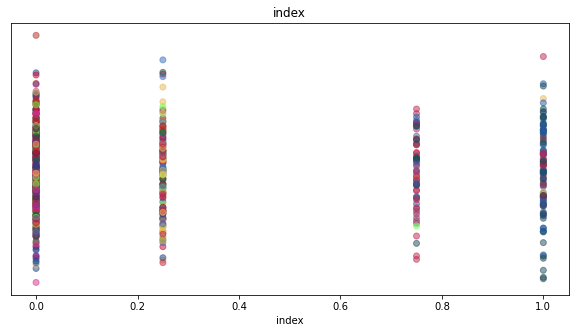

In [33]:
# jittered 1d scatterplot for dk_out_eu
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_scales['index'], np.random.normal(0, 0.04, df_scales.shape[0]), color=df_scales['color'], alpha=0.5)
ax.set_xlabel('index')
ax.set_yticks([])
ax.set_title('index')
plt.show()

## Politiken.dk candidate test attempt

In [59]:
for id in tqdm(range(3475, 4494+1)): # all ids are in this interval, but not all are valid

    url = 'https://politiken.dk/fv19endpoint/candidate/getCandidateResult/' + str(id) + '/?extraInfo=true'
    r = requests.get(url)
    
    try:
        # get json data at url
        data = r.json()

        with open('validation/politiken/candidate_no_' + str(id) + '.json', 'w') as f:
            json.dump(data, f)

    except:
        print('No data found for id ' + str(id))

    # Wait a few secs for good measure
    time.sleep(2)

  0%|          | 0/989 [00:00<?, ?it/s]

No data found for id 3507
No data found for id 3533
No data found for id 3572
No data found for id 3593
No data found for id 3648
No data found for id 3722
No data found for id 3728
No data found for id 3777
No data found for id 3859
No data found for id 3885
No data found for id 3897
No data found for id 4041
No data found for id 4066
No data found for id 4090
No data found for id 4093
No data found for id 4111
No data found for id 4172
No data found for id 4213
No data found for id 4229
No data found for id 4231
No data found for id 4238
No data found for id 4276
No data found for id 4301
No data found for id 4310
No data found for id 4312
No data found for id 4314
No data found for id 4329
No data found for id 4350
No data found for id 4369
No data found for id 4384
No data found for id 4442
No data found for id 4451


In [66]:
with open('validation/politiken/candidate_no_' + '3501' + '.json', 'r') as f:
    data = json.load(f)

In [78]:
test_df

,CandidateID,CandidateName,PartyID,PartyName,QuestionID,CandidateAnswer,Note
0,3501,Frederik Valdemar Brøndahl Enevoldsen,420,Socialdemokratiet,264,3,
1,3501,Frederik Valdemar Brøndahl Enevoldsen,420,Socialdemokratiet,265,1,
2,3501,Frederik Valdemar Brøndahl Enevoldsen,420,Socialdemokratiet,266,4,
3,3501,Frederik Valdemar Brøndahl Enevoldsen,420,Socialdemokratiet,267,5,
4,3501,Frederik Valdemar Brøndahl Enevoldsen,420,Socialdemokratiet,268,4,
5,3501,Frederik Valdemar Brøndahl Enevoldsen,420,Socialdemokratiet,269,4,
6,3501,Frederik Valdemar Brøndahl Enevoldsen,420,Socialdemokratiet,270,4,
7,3501,Frederik Valdemar Brøndahl Enevoldsen,420,Socialdemokratiet,271,3,
8,3501,Frederik Valdemar Brøndahl Enevoldsen,420,Socialdemokratiet,272,4,
9,3501,Frederik Valdemar Brøndahl Enevoldsen,420,Socialdemokratiet,273,3,


In [96]:
# convert data to dataframe
test_df = pd.DataFrame(data)

# unpack nested columns CompareResults
test_df = pd.concat([test_df.drop(['CompareResults'], axis=1), test_df['CompareResults'].apply(pd.Series)], axis=1)

# pivot QuestionID and CandidateAnswer columns to wide format
test_df = test_df.pivot_table(index=['CandidateID', 'CandidateName'], columns='QuestionID', values='CandidateAnswer').reset_index()

In [97]:
test_df

QuestionID,CandidateID,CandidateName,264,265,266,267,268,269,270,271,...,274,275,276,277,278,279,280,281,282,283
0,4341,Linda Englyst,2,1,1,4,3,5,4,2,...,1,2,4,4,2,4,5,4,2,1


In [98]:
df = pd.DataFrame()

In [99]:
df.append(test_df)

QuestionID,CandidateID,CandidateName,264,265,266,267,268,269,270,271,...,274,275,276,277,278,279,280,281,282,283
0,4341,Linda Englyst,2,1,1,4,3,5,4,2,...,1,2,4,4,2,4,5,4,2,1


In [111]:
# read json files and combine into one dataframe
path = 'validation/politiken/*.json'
files = glob.glob(path)

df = pd.DataFrame()

for file in tqdm(files):
    with open(file) as f:
        data = json.load(f)

    # convert data to dataframe
    temp_df = pd.DataFrame(data)

    # unpack nested columns CompareResults
    temp_df = pd.concat([temp_df.drop(['CompareResults'], axis=1), temp_df['CompareResults'].apply(pd.Series)], axis=1)

    # pivot QuestionID and CandidateAnswer columns to wide format
    temp_df = temp_df.pivot_table(index=['CandidateID', 'CandidateName'], columns='QuestionID', values='CandidateAnswer').reset_index()

    df = df.append(temp_df)

  0%|          | 0/988 [00:00<?, ?it/s]

In [118]:
df.rename(columns={'CandidateName': 'fullname', 280: 'dk_opt_out'}, inplace=True)

array([[<AxesSubplot:title={'center':'dk_opt_out'}>]], dtype=object)

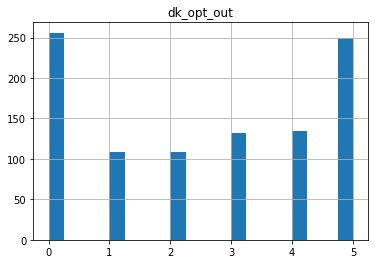

In [120]:
df[['fullname', 'dk_opt_out']].hist(bins=20)

In [121]:
df.to_pickle('validation/politiken/df_politiken.p')